# ML @ Scikit-Learn / 20241001

！！！🐍 由于原著版权原因，此学习笔记仅限个人交流学习目的，不做任何商业或广播用途。  
！！！🐍 Reference: --> https://scikit-learn.org/stable/index.html

# User Guide - 用户指南 / 20241010

# §00 - Section Navigation / 目录导航

1. Supervised learning / 监督学习
2. Unsupervised learning / 无监督学习
3. Model selection and evaluation / 模型选择和评估
4. Inspection / 检查
5. Visualizations / 可视化
6. Dataset transformations / 数据集转换
7. Dataset loading utilities / 数据集加载实用程序
8. Computing with scikit-learn / 使用 scikit-learn 进行计算
9. Model persistence / 模型持久性
10. Common pitfalls and recommended practices / 常见陷阱和推荐做法
11. Dispatching / 调度
12. Choosing the right estimator / 选择正确的估算器
13. External Resources, Videos and Talks / 外部资源、视频和演讲

# 1. Supervised learning / 监督学习

## 1.6. [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html) / 邻近学习 - 20241017

[sklearn.neighbors](https://scikit-learn.org/stable/api/sklearn.neighbors.html#module-sklearn.neighbors) 为无监督和监督的基于邻居的学习方法提供功能。无监督的最近​​邻是许多其他学习方法的基础，尤其是流形学习和谱聚类。监督的基于邻居的学习有两种形式：[分类](https://scikit-learn.org/stable/modules/neighbors.html#classification)用于具有离散标签的数据，[回归](https://scikit-learn.org/stable/modules/neighbors.html#regression)用于具有连续标签的数据。<br><br>
最近邻方法背后的原理是找到距离新点最近的预定义数量的训练样本，并从中预测标签。样本数量可以是用户定义的常数（`k-最近邻学习`），也可以根据点的局部密度变化（`基于半径的邻居学习`）。距离通常可以是任何度量标准：标准欧几里得距离是最常见的选择。基于邻居的方法被称为非通用机器学习方法，因为它们只是“记住”其所有训练数据（可能转换为快速索引结构，例如 [Ball Tree](https://scikit-learn.org/stable/modules/neighbors.html#ball-tree) 或 [KD Tree](https://scikit-learn.org/stable/modules/neighbors.html#kd-tree))。<br><br>
尽管简单，但最近邻已在大量分类和回归问题中取得成功，包括手写数字和卫星图像场景。作为一种“非参数方法”，它通常在决策边界非常不规则的分类情况下取得成功。<br><br>

`sklearn.neighbors`中的类可以处理 NumPy 数组或`scipy.sparse`矩阵作为输入。对于密集矩阵，支持大量可能的距离度量。对于稀疏矩阵，支持任意 Minkowski 度量进行搜索。<br><br>

有许多学习例程的核心依赖于最近邻居。一个例子是 [核密度估计](https://scikit-learn.org/stable/modules/density.html#kernel-density)，在 [密度估计](https://scikit-learn.org/stable/modules/density.html#density-estimation) 部分中讨论。

### 1.6.1. Unsupervised Nearest Neighbors / 无监督最近邻

[NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) 实现无监督的最近​​邻学习。它充当三种不同最近邻算法的统一接口：`Ball Tree`、`KD Tree` 和基于 [sklearn.metrics.pairwise](https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics.pairwise) 中例程的 `brute-force 算法`。邻居搜索 `algorithm` 的选择通过关键字 'algorithm' 控制，该关键字必须是 `['auto', 'ball_tree', 'kd_tree', 'brute']` 之一。当传递默认值 `'auto'` 时，算法会尝试从训练数据中确定最佳方法。有关每个选项的优缺点的讨论，请参阅[最近邻算法](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms)。<br><br>
<span style="color:red">**警告：**<br>
关于最近邻算法，如果两个邻居 $k+1$ 和 $k$ 距离相同但标签不同，则结果将取决于训练数据的顺序。</span>

#### 1.6.1.1. Finding the Nearest Neighbors / 寻找最近邻居

对于在两组数据之间找到最近邻居的简单任务，可以使用 [sklearn.neighbors](https://scikit-learn.org/stable/api/sklearn.neighbors.html#module-sklearn.neighbors) 中的无监督算法：

In [2]:
# find the nearest neighbors of a set of points
# d01_6_11_1_nearestneighbors.py

from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

print(indices)
print(distances)

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]


由于查询集与训练集相匹配，因此每个点的最近邻居就是该点本身，距离为零。<br><br>
还可以有效地生成显示相邻点之间连接的稀疏图：

In [3]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

数据集的结构使得按索引顺序相邻的点在参数空间中也相邻，从而形成一个近似块对角的 K 近邻矩阵。这种稀疏图在利用点之间的空间关系进行无监督学习的各种情况下都很有用：具体而言，请参阅 [Isomap](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)、[LocallyLinearEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html#sklearn.manifold.LocallyLinearEmbedding) 和 [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)。

#### 1.6.1.2. KDTree and BallTree Classes / KDTree 和 BallTree 类

或者，可以直接使用 [KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree) 或 [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree) 类来查找最近邻居。这是上面使用的 [NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) 类包装的功能。Ball Tree 和 KD Tree 具有相同的接口；我们将在此处展示使用 KD Tree 的示例：

In [5]:
# KDTree class
# d01_6_12_2_kdtree.py

from sklearn.neighbors import KDTree
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=True)

(array([[0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.41421356],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.41421356]]),
 array([[0, 1],
        [1, 0],
        [2, 1],
        [3, 4],
        [4, 3],
        [5, 4]], dtype=int64))

有关最近邻搜索可用选项的更多信息，包括查询策略、距离度量等的规范，请参阅 `KDTree` 和 `BallTree` 类文档。有关有效度量的列表，请使用 `KDTree.valid_metrics` 和 `BallTree.valid_metrics`：

In [7]:
from sklearn.neighbors import KDTree, BallTree

print(KDTree.valid_metrics)

print(BallTree.valid_metrics)

['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'hamming', 'canberra', 'braycurtis', 'jaccard', 'dice', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'pyfunc']


### 1.6.2. Nearest Neighbors Classification / 最近邻分类

基于邻居的分类是一种基于实例的学习或非泛化学习：它不试图构建通用的内部模型，而只是存储训练数据的实例。分类是根据每个点的最近邻居的简单多数投票计算得出的：查询点被分配到在该点的最近邻居中具有最多代表性的数据类。<br><br>
scikit-learn 实现了两种不同的最近邻居分类器：[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) 基于每个查询点的 $k$ 个最近邻居实现学习，其中 $k$ 是用户指定的整数值。 [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier) 根据每个训练点固定半径 $r$ 内的邻居数量实现学习，其中 $r$ 是用户指定的浮点值。

`KNeighborsClassifier` 中的 $k$ 邻居分类是最常用的技术。值 $k$ 的最佳选择高度依赖于数据：通常，较大的 $k$ 会抑制噪声的影响，但会使分类边界不太明显。

在数据不是均匀采样的情况下，`RadiusNeighborsClassifier` 中基于半径的邻居分类可能是更好的选择。用户指定固定半径 $r$，这样稀疏邻域中的点使用较少的最近邻居进行分类。对于高维参数空间，由于所谓的“维数灾难”，这种方法变得不那么有效。

基本的最近邻分类使用统一权重：即分配给查询点的值是根据最近邻居的简单多数投票计算得出的。在某些情况下，最好对邻居进行加权，使得较近的邻居对拟合的贡献更大。这可以通过 `weights` 关键字来实现。默认值 `weights = 'uniform'` 为每个邻居分配统一的权重。`weights = 'distance'` 分配的权重与查询点距离的倒数成比例。或者，可以提供距离的用户定义函数来计算权重。

**示例**

[最近邻分类](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)：使用最近邻进行分类的示例。

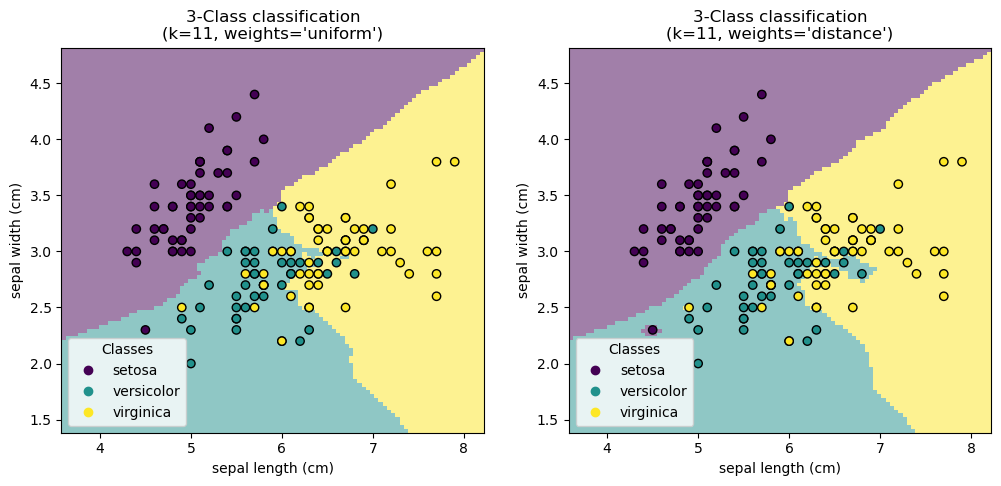

In [2]:
# an example of classification using nearest neighbors

%run d01_6_eg1_plot_classification.py

### 1.6.3. Nearest Neighbors Regression / 最近邻回归

基于邻居的回归可用于数据标签为连续变量而非离散变量的情况。分配给查询点的标签是根据其最近邻居的标签的平均值计算的。

scikit-learn 实现了两个不同的邻居回归器：[KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) 基于每个查询点的 $k$ 个最近邻居实现学习，其中 $k$ 是用户指定的整数值。 [RadiusNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor) 基于查询点固定半径 $r$ 内的邻居实现学习，其中 $r$ 是用户指定的浮点值。

基本最近邻回归使用均匀权重：即，局部邻域中的每个点对查询点的分类贡献均匀。在某些情况下，对点进行加权，使得附近的点对回归的贡献大于远处的点，这是有利的。这可以通过 `weights` 关键字来实现。默认值 `weights = 'uniform'` 为所有点分配相同的权重。`weights = 'distance'` 分配的权重与查询点距离的倒数成比例。或者，可以提供用户定义的距离函数，该函数将用于计算权重。

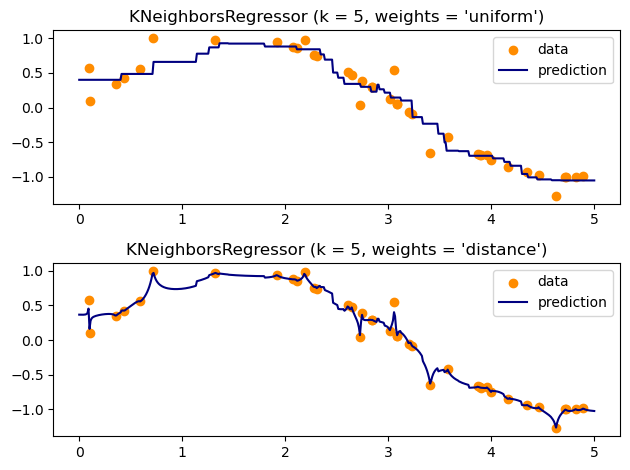

In [3]:
# Nearest Neighbors regression

%run d01_6_eg2_plot_regression.py

[使用多输出估计器进行人脸补全](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multioutput_face_completion.html#sphx-glr-auto-examples-miscellaneous-plot-multioutput-face-completion-py) 演示了如何使用多输出最近邻进行回归。在此示例中，输入 X 是人脸上半部分的像素，输出 Y 是人脸下半部分的像素。

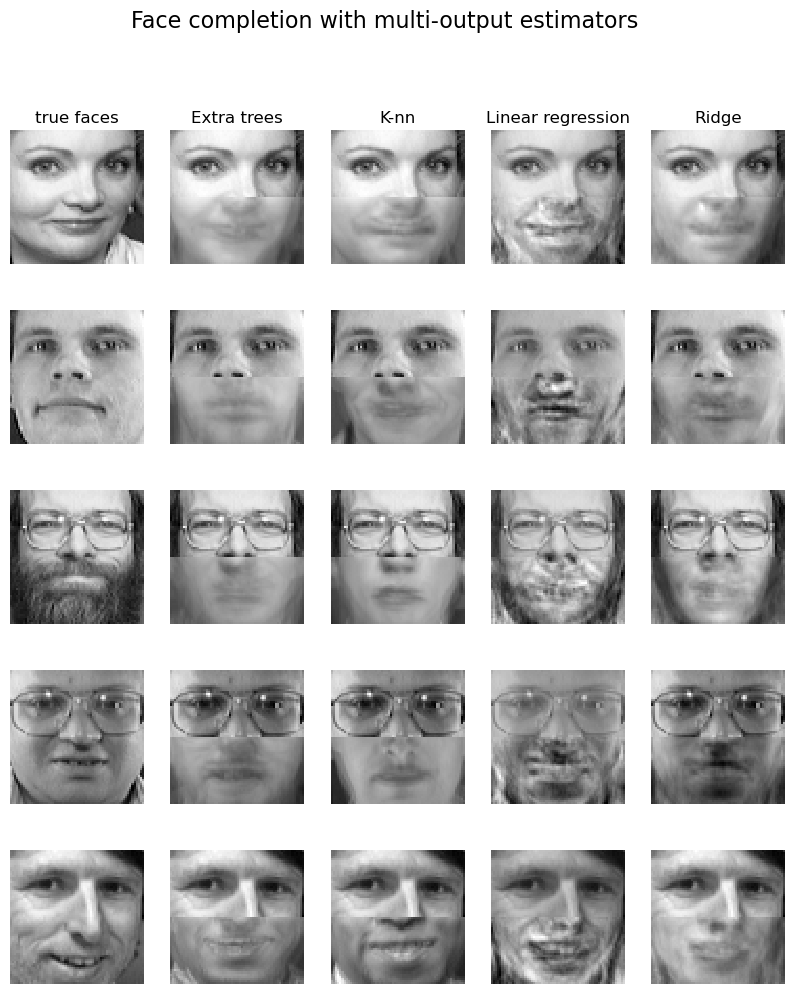

In [10]:
# Face completion with a multi-output estimators

%run d01_6_eg3_plot_multioutput_face_completion.py

**示例：**<br>
- [最近邻回归](https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html)：使用最近邻进行回归的示例。
- [使用多输出估计器进行人脸补全](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multioutput_face_completion.html#sphx-glr-auto-examples-miscellaneous-plot-multioutput-face-completion-py)：使用最近邻进行多输出回归的示例。

### 1.6.4. Nearest Neighbor Algorithms / 最近邻算法

#### 1.6.4.1. Brute Force / 暴力破解

快速计算最近邻是机器学习的一个活跃研究领域。最简单的邻居搜索实现涉及强力计算数据集中所有点对之间的距离：对于 $D$ 维中的 $N$ 个样本，此方法的规模为 $O[DN^2]$。对于小数据样本，高效的强力邻居搜索可能非常具有竞争力。但是，随着样本数量 $N$ 的增加，强力方法很快变得不可行。在 [sklearn.neighbors](https://scikit-learn.org/stable/api/sklearn.neighbors.html#module-sklearn.neighbors) 中的类中，使用关键字 `algorithm = 'brute'` 指定强力邻居搜索，并使用 [sklearn.metrics.pairwise](https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics.pairwise) 中可用的例程进行计算。

#### 1.6.4.2. K-D Tree / K-D树

为了解决蛮力法计算效率低的问题，人们发明了各种基于树的数据结构。一般来说，这些结构试图通过高效编码样本的聚合距离信息来减少所需的距离计算次数。基本思想是，如果点 $A$ 与点 $B$ 相距很远，而点 $B$ 与点 $C$ 非常接近，那么我们就知道点 $A$ 和 $C$ 相距很远，而不必明确计算它们的距离。这样，最近邻搜索的计算成本可以降低到 $O[DNlog(N)]$ 或更低。对于较大的 $N$，这比蛮力法有了显著的改进。

利用这种聚合信息的早期方法是 KD 树数据结构（K 维树的缩写），它将二维四叉树和三维八叉树推广到任意数量的维度。 KD 树是一种二叉树结构，它沿数据轴递归地划分参数空间，将其划分为嵌套的正交各向异性区域，数据点存放在这些区域中。KD 树的构建非常快：因为划分仅沿数据轴进行，所以不需要计算 $D$ 维距离。一旦构建完成，只需进行 $O[log(N)]$ 距离计算即可确定查询点的最近邻居。虽然 KD 树方法对于低维（D<20$）邻居搜索非常快，但随着 $D$ 变得非常大，它变得效率低下：这是所谓“维数灾难”的一种表现。在 scikit-learn 中，KD 树邻居搜索使用关键字 `algorithm = 'kd_tree'` 指定，并使用类 [KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree) 进行计算。

#### 1.6.4.3. Ball Tree / 球树

为了解决 KD 树在高维空间中的低效率问题，开发了 *球树*

数据结构。KD 树沿笛卡尔轴划分数据，而球树则在一系列嵌套的超球体中划分数据。这使得树的构建比 KD 树的成本更高，但产生的数据结构在高度结构化的数据上非常高效，即使在非常高的维度中也是如此。

球树以递归方式将数据划分为由质心 $C$ 和半径 $r$ 定义的节点，使得节点中的每个点都位于由 $r$ 和 $C$ 定义的超球体内。通过使用 *三角不等式*，可以减少邻居搜索的候选点数量：

$$|x+y| \leq |x| + |y|$$

使用此设置，测试点和质心之间的单个距离计算足以确定到节点内所有点的距离的下限和上限。

由于球树节点的球形几何形状，它在高维度上的表现可以优于 *KD 树*，尽管实际性能在很大程度上取决于训练数据的结构。
在 scikit-learn 中，基于球树的
邻居搜索使用关键字 ``algorithm = 'ball_tree'`` 指定，
并使用类 `BallTree` 进行计算。
或者，用户可以直接使用 `BallTree` 类。

<details>
**<summary><blockquote>参考资料</blockquote></summary>**
- [“五 Balltree 构造算法”](https://citeseerx.ist.psu.edu/doc_view/pid/17ac002939f8e950ffb32ec4dc8e86bdd8cb5ff1)，Omohundro，S.M.，国际计算机科学研究所技术报告 (1989)
</details>

<details>
**<summary><blockquote>最近邻算法的选择</blockquote></summary>**
对于给定的数据集，最佳算法的选择非常复杂，并且
取决于许多因素：

*样本数量 $N$（即 ``n_samples``）和维数
$D$（即 ``n_features``）。

* *强力*查询时间随着 $O[DN]$ 而增长

* *球树*查询时间随着 $O[D \log(N)]$ 而增长

* *KD 树*查询时间随着 $D$ 而变化，这种变化很难
准确描述。对于较小的 $D$（小于 20 左右），成本约为 $O[D \log(N)]$，KD 树查询非常高效。对于较大的 $D$，成本增加到接近 $O[DN]$，并且由于树结构而产生的开销可能导致查询比暴力搜索更慢。对于较小的数据集（$N$ 小于 30 左右），$\log(N)$ 与 $N$ 相当，暴力搜索算法比基于树的方法更高效。`KDTree` 和 `BallTree` 都通过提供 *叶子大小* 参数来解决这个问题：它控制查询切换到暴力搜索的样本数量。这使得两种算法都能接近小
$N$ 的强力计算效率。

* 数据结构：数据的 *固有维数* 和/或数据的 *稀疏性*。固有维数是指数据所在的流形的维数
$d \le D$，它可以线性或非线性地嵌入参数空间中。稀疏性是指数据填充参数空间的程度（这与“稀疏”矩阵中使用的概念不同。数据矩阵可能没有零项，但 **结构** 在这个意义上仍然可以是“稀疏的”）。

* *强力* 查询时间不受数据结构的影响。
* *Ball 树* 和 *KD 树* 查询时间会受到数据结构的很大影响。一般来说，具有较小固有维数的稀疏数据会导致更快的查询时间。因为 KD 树
内部表示与参数轴对齐，所以对于任意结构化的数据，它通常不会像球树那样表现出那么多的改进。
机器学习中使用的数据集往往非常结构化，非常适合基于树的查询。
* 查询点请求的邻居数 $k$。
* *蛮力*查询时间基本不受 $k$ 值的影响
* *球树*和 *KD 树*查询时间会随着 $k$ 的增加而变慢。这是由于两个影响：首先，较大的 $k$ 导致需要搜索更大部分的参数空间。
其次，使用 $k > 1$ 需要在遍历树时对结果进行内部排队。
随着 $k$ 相对于 $N$ 变大，基于树的查询中修剪分支的能力会降低。在这种情况下，强力查询会更有效。

* 查询点的数量。球树和 KD 树都需要构建阶段。当分摊到许多查询上时，此构建的成本变得可以忽略不计。但是，如果只执行少量查询，则构建可以占总成本的很大一部分。如果需要的查询点很少，强力查询比基于树的方法更好。

目前，如果以下任何条件得到验证，``algorithm = 'auto'`` 会选择 ``'brute'``：

* 输入数据稀疏
* ``metric = 'precomputed'``
* $D > 15$
* $`k >= N/2$
* ``effective_metric_`` 不在 ``'kd_tree'`` 或 ``'ball_tree'`` 的 ``VALID_METRICS`` 列表中

否则，它会在 ``'kd_tree'`` 和 ``'ball_tree'`` 中选择第一个在其 ``VALID_METRICS`` 列表中具有 ``effective_metric_`` 的。此启发式方法基于以下假设：

* 查询点的数量至少与训练点的数量相同
* ``leaf_size`` 接近其默认值 ``30``
* 当 $D > 15$ 时，数据的固有维数通常对于基于树的方法来说太高
</details>

### 1.6.5. Nearest Centroid Classifier / 最近质心分类器

`NearestCentroid` 分类器是一种简单的算法，它用每个类的成员的质心来表示每个类。实际上，这使其类似于 `KMeans` 算法的标签更新阶段。它也没有参数可供选择，因此是一个很好的基线分类器。然而，它在非凸类上会受到影响，当类具有截然不同的方差时，它会受到影响，因为假设所有维度的方差相等。有关不做此假设的更复杂方法，请参阅线性判别分析 (`LinearDiscriminantAnalysis`) 和二次判别分析 (`QuadraticDiscriminantAnalysis`)。默认 `NearestCentroid` 的使用很简单：

In [5]:
# Nearest centroid classifier
# d01_6_5_1_nearestcentroid.py

from sklearn.neighbors import NearestCentroid
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = NearestCentroid()
print(clf)

clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

NearestCentroid()
[1]


#### 1.6.5.1. Nearest Shrunken Centroid / 最近收缩质心

`NearestCentroid` 分类器有一个 `shrink_threshold` 参数，它实现了最近收缩质心分类器。实际上，每个质心的每个特征值除以该特征的类内方差。然后，特征值会减少 `shrink_threshold`。最值得注意的是，如果某个特定特征值超过零，则将其设置为零。实际上，这会消除该特征对分类的影响。例如，这对于去除噪声特征很有用。

在下面的示例中，使用较小的收缩阈值可将模型的准确率从 0.81 提高到 0.82。

None 0.8133333333333334
0.2 0.82


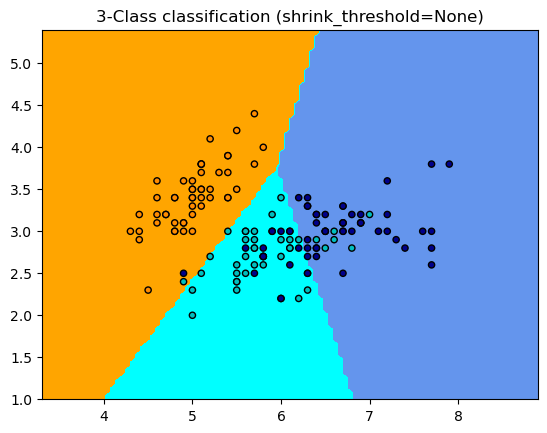

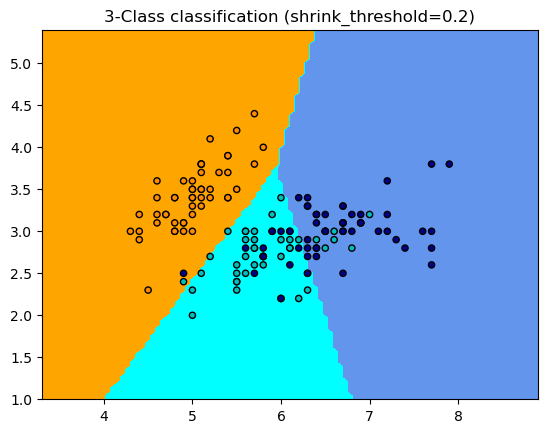

In [6]:
# Nearest Shrunken Centroid

%run d01_6_eg4_plot_nearest_centroid.py

**示例**

- [最近质心分类](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nearest_centroid.html#sphx-glr-auto-examples-neighbors-plot-nearest-centroid-py)：使用具有不同收缩阈值的最近质心进行分类的示例。

### 1.6.6. Nearest Neighbors Transformer / 最近邻居转换器

许多 scikit-learn 估计器依赖于最近邻：几个分类器和回归器，例如 `KNeighborsClassifier` 和 `KNeighborsRegressor`，还有一些聚类方法，例如 `DBSCAN` 和 `SpectralClustering`，以及一些流形嵌入，例如 `TSNE` 和 `Isomap`。

所有这些估计器都可以在内部计算最近邻，但它们中的大多数也接受预先计算的最近邻 `稀疏图`，如 `kneighbors_graph` 和 `radius_neighbors_graph` 所示。在模式 `mode='connectivity'` 下，这些函数会根据需要返回二元邻接稀疏图，例如在 `SpectralClustering` 中。而在模式 `mode='distance'` 下，它们会根据需要返回距离稀疏图，例如在 `DBSCAN` 中。要将这些函数包含在 scikit-learn 管道中，还可以使用相应的类`KNeighborsTransformer`和`RadiusNeighborsTransformer`。此稀疏图 API 有多种好处。

首先，预先计算的图可以多次重复使用，例如在改变估计器的参数时。这可以由用户手动完成，也可以使用 scikit-learn 管道的缓存属性：

In [7]:
# Nearest Neighbors Transformer
# d01_6_6_1_nearestneighbors_transformer.py

import tempfile
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
cache_path = tempfile.gettempdir()  # we use a temporary folder here

X, _ = make_regression(n_samples=50, n_features=25, random_state=0)
estimator = make_pipeline(
    KNeighborsTransformer(mode='distance'),
    Isomap(n_components=3, metric='precomputed'),
    memory=cache_path)

X_embedded = estimator.fit_transform(X)
X_embedded.shape

(50, 3)

其次，预计算图可以对最近邻估计进行更精细的控制，例如通过参数`n_jobs`启用多处理，这可能不是所有估计器都可用。

最后，预计算可以由自定义估计器执行，以使用不同的实现，例如近似最近邻方法或具有特殊数据类型的实现。预计算的邻居`稀疏图`需要格式化为`radius_neighbors_graph`输出：

- CSR 矩阵（尽管 COO、CSC 或 LIL 也可以接受）。

- 仅明确存储每个样本相对于训练数据的最近邻域。这应该包括距离查询点 0 的邻域，包括计算训练数据与其自身之间的最近邻域时的矩阵对角线。

- 每行的数据应按递增顺序存储距离（可选。未排序的数据将进行稳定排序，这会增加计算开销）。

- `data(数据)`中的所有值都应为非负值。

- 任何行都不应有重复的`indices(索引)`（请参阅​​ github [scipy/scipy#5807](https://github.com/scipy/scipy/issues/5807)）。

- 如果传递的算法的预计算矩阵使用 k 个最近邻居（而不是半径邻域），则每行必须存储至少 k 个邻居（或 k+1，如下面注释中所述）。

**示例**

- [Approximate nearest neighbors in TSNE(TSNE 中的近似最近邻)](https://scikit-learn.org/stable/auto_examples/neighbors/approximate_nearest_neighbors.html#sphx-glr-auto-examples-neighbors-approximate-nearest-neighbors-py)：流水线 `KNeighborsTransformer` 和 `TSNE` 的示例。还提出了两个基于外部包的自定义最近邻估计器。

- [Caching nearest neighbors(缓存最近邻居)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_caching_nearest_neighbors.html#sphx-glr-auto-examples-neighbors-plot-caching-nearest-neighbors-py)：流水线 `KNeighborsTransformer` 和 `KNeighborsClassifier` 的示例，以便在超参数网格搜索期间缓存邻居图。

### 1.6.7. Neighborhood Components Analysis / 邻域成分分析

邻域成分分析（`NCA，NeighborhoodComponentsAnalysis`）是一种距离度量学习算法，旨在提高与标准欧几里得距离相比的最近邻分类的准确性。该算法直接最大化训练集上的留一法 k 最近邻 (KNN) 得分的随机变体。它还可以学习数据的低维线性投影，可用于数据可视化和快速分类。

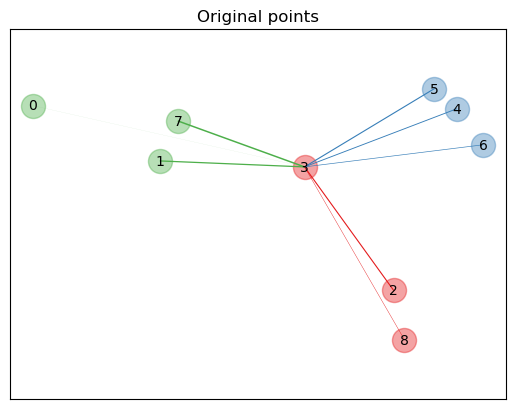

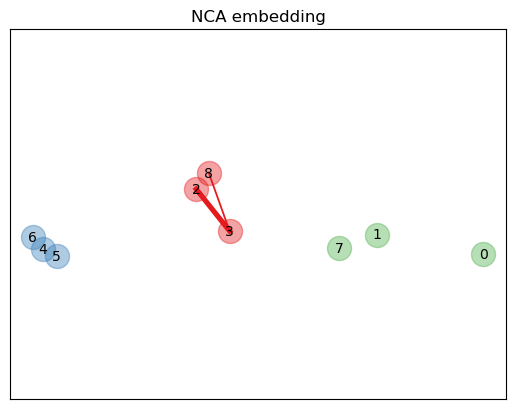

In [9]:
# Neighborhood Components Analysis

%run d01_6_eg7_plot_nca_illustration.py

在上图中，我们考虑了随机生成的数据集中的一些点。我们重点关注点 3 的随机 KNN 分类。样本 3 与另一个点之间的链接厚度与它们的距离成正比，可以看作是随机最近邻预测规则分配给该点的相对权重（或概率）。在原始空间中，样本 3 具有来自不同类别的许多随机邻居，因此正确的类别不太可能。然而，在 NCA 学习到的投影空间中，唯一具有不可忽略权重的随机邻居来自与样本 3 相同的类别，从而保证后者将被很好地分类。有关更多详细信息，请参阅`数学公式`。

#### 1.6.7.1. Classification / 分类

与最近邻分类器 (`KNeighborsClassifier`) 结合使用时，NCA 非常适合用于分类，因为它可以自然地处理多类问题，而不会增加模型大小，并且不会引入需要用户微调的额外参数。

实践表明，NCA 分类对于不同大小和难度的数据集效果良好。与线性判别分析等相关方法相比，NCA 不对类分布做出任何假设。最近邻分类可以自然产生高度不规则的决策边界。

要使用此模型进行分类，需要将学习最佳变换的 `NeighborhoodComponentsAnalysis` 实例与在投影空间中执行分类的 `KNeighborsClassifier` 实例相结合。以下是使用这两个类的示例：

In [11]:
# Nearest Neighbors Classification
# d01_6_71_1_nearestneighbors_classification.py

from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y, test_size=0.7, random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print(nca_pipe)

print(nca_pipe.score(X_test, y_test))

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])
0.9619047619047619


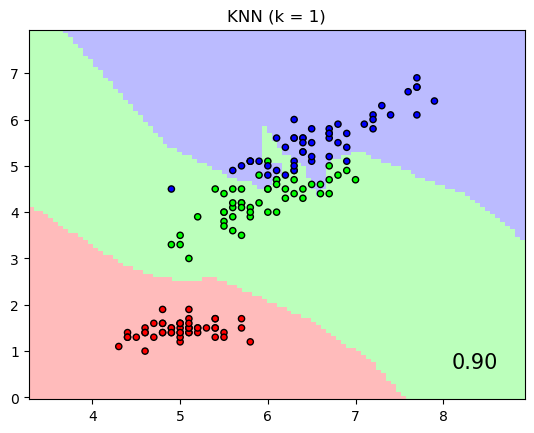

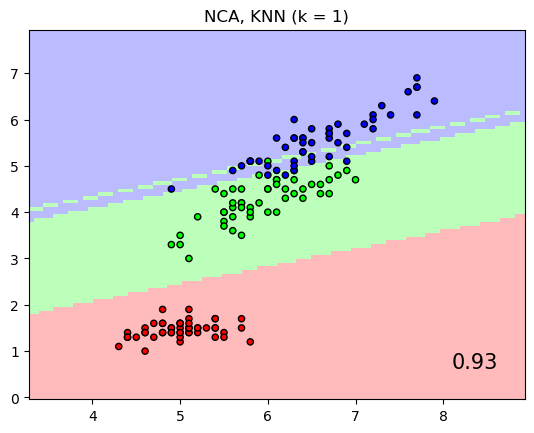

In [12]:
# Nearest Neighbors nca classification

%run d01_6_eg8_plot_nca_classification.py

为了实现可视化目的，该图显示了在仅对两个特征进行训练和评分时，鸢尾花数据集上的最近邻分类和邻域成分分析分类的决策边界。

#### 1.6.7.2. Dimensionality reduction / 降维

NCA 可用于执行监督降维。输入数据被投影到由最小化 NCA 目标的方向组成的线性子空间上。可以使用参数 ``n_components`` 设置所需的维度。例如，下图显示了在 Digits 数据集上，使用主成分分析 (`PCA`)、线性判别分析 (`LinearDiscriminantAnalysis`) 和邻域成分分析 (`NeighborhoodComponentsAnalysis`) 进行降维的比较，Digits 数据集的大小为 $n_{samples} = 1797$ 和 $n_{features} = 64$。数据集被分成大小相等的训练集和测试集，然后进行标准化。为了进行评估，在每种方法找到的二维投影点上计算 3 个最近邻分类准确率。每个数据样本属于 10 个类中的一个。

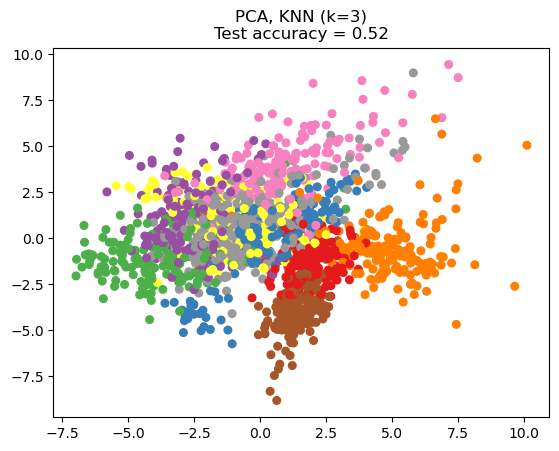

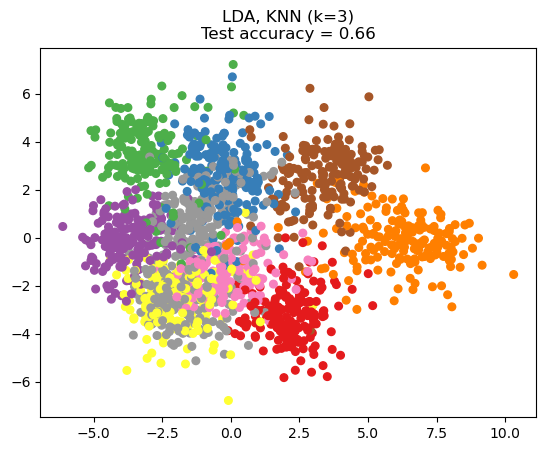

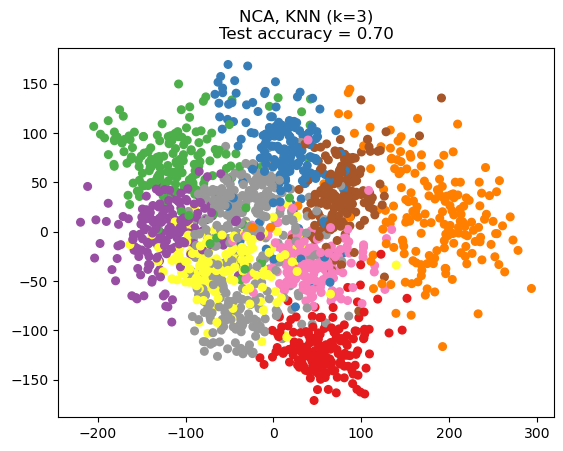

In [13]:
%run d01_6_eg9_plot_nca_dim_reduction.py

**Examples**

- [Comparing Nearest Neighbors with and without Neighborhood Components Analysis(使用和不使用邻域成分分析比较最近邻)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_classification.html#sphx-glr-auto-examples-neighbors-plot-nca-classification-py)

- [Dimensionality Reduction with Neighborhood Components Analysis(使用邻域成分分析进行降维)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py)

- [Manifold learning on handwritten digits: Locally Linear Embedding, Isomap…(手写数字的流形学习：局部线性嵌入)](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)

#### 1.6.7.3. Mathematical formulation / 数学公式

NCA 的目标是学习一个大小为 ``(n_components, n_features)`` 的最优线性变换矩阵，该矩阵最大化所有样本 $i$ 中正确分类的概率 $p_i$ 的总和，即：

$$\underset{L}{\arg\max} \sum\limits_{i=0}^{N - 1} p_{i}$$

其中 $N$ = ``n_samples``，$p_i$ 是样本 $i$ 根据学习到的嵌入空间中的随机最近邻规则被正确分类的概率：

$$p_{i}=\sum\limits_{j \in C_i}{p_{i j}}$$

其中 $C_i$ 是与样本 $i$ 属于同一类的点集，

$p_{i j}$ 是欧几里得距离的 softmax嵌入
空间：

$$p_{i j} = \frac{\exp(-||L x_i - L x_j||^2)}{\sum\limits_{k \ne
i} {\exp{-(||L x_i - L x_k||^2)}}} , \quad p_{i i} = 0$$

<details>
<summary><blockquote>马哈拉诺比斯距离</blockquote></summary>

NCA 可以看作是学习（平方）马哈拉诺比斯距离度量：

$$|| L(x_i - x_j)||^2 = (x_i - x_j)^TM(x_i - x_j)$$

其中 $M = L^T L$ 是大小为
``(n_features, n_features)`` 的对称半正定矩阵。
</details>

#### 1.6.7.4. Implementation / 实现
此实现遵循原始论文 $[1]$ 中的解释。对于优化方法，它目前使用 scipy 的 L-BFGS-B，并在每次迭代时进行完整的梯度计算，以避免调整学习率并提供稳定的学习。

有关更多信息，请参阅下面的示例和 `NeighborhoodComponentsAnalysis.fit` 的文档字符串。

#### 1.6.7.5. Complexity / 复杂度
#####  1.6.7.5.1. Training / 训练
NCA 存储成对距离矩阵，占用 `n_samples ** 2` 内存。时间复杂度取决于优化算法进行的迭代次数。但是，可以使用参数 `max_iter` 设置最大迭代次数。对于每次迭代，时间复杂度为 `O(n_components x n_samples x min(n_samples, n_features))`。

##### 1.6.7.5.2. Transform / 转换
此处的`transform`操作返回 $LX^T$，因此其时间复杂度等于`n_components * n_features * n_samples_test`。操作中没有增加空间复杂度。

**References**

[1] “[Neighbourhood Components Analysis](https://cs.nyu.edu/~roweis/papers/ncanips.pdf)”, J. Goldberger, S. Roweis, G. Hinton, R. Salakhutdinov, Advances in Neural Information Processing Systems, Vol. 17, May 2005, pp. 513-520.

- [Wikipedia entry on Neighborhood Components Analysis](https://en.wikipedia.org/wiki/Neighbourhood_components_analysis)